# Investigating Fandango Movie Ratings

## Introduction

**Content:** 

In October 2015 data journalist Walt Hickey analyzed movie ratings data from [Fandango](https://www.fandango.com/) (an online movie ratings aggregator) and found evidence that rating system was dishonest.

Fandango displays a 5-star rating system on their website, where the minimum rating is 0 stars and the maximum is 5 stars. In the HTML of the page Hickey found out significant discrepancy between the number od stars display to users and the actual rating. He found that:
- The actual rating was almost always rounded up to the nearest half-star. For instance, a 4.1 movie would be rounded off to 4.5 stars, not to 4 stars, as you may expect.
- In the case of 8% of the ratings analyzed, the rounding up was done to the nearest whole star. For instance, a 4.5 rating would be rounded off to 5 stars.
- For one movie rating, the rounding off was completely bizarre: from a rating of 4 in the HTML of the page to a displayed rating of 5 stars.

In [1]:
# import libraries to show image
from IPython.display import Image
from IPython.core.display import HTML 
# showing the image
Image(url= "https://s3.amazonaws.com/dq-content/288/s1gp_actual_vs_displayed.png")

**Goal:** 

In this project we will analyze more recent movie ratings data to determinate if there has been any change in Fandango's rating system after Hickey's analysis.

## Understanding the Data

One of the best ways to figure out whether there has been any change in Fandango's rating system after Hickey's analysis is to compare the system's characteristics previous and after the analysis.

- Walt Hickey made the data he analyzed publicly available on [GitHub](https://github.com/fivethirtyeight/data/tree/master/fandango). We'll use the data he collected to analyze the characteristics of Fandango's rating system previous to his analysis.
- One of Dataquest's team members collected movie ratings data for movies released in 2016 and 2017. The data is publicly available on [GitHub](https://github.com/mircealex/Movie_ratings_2016_17) and we'll use it to analyze the rating system's characteristics after Hickey's analysis.

In [2]:
# import the necessary libraries
import pandas as pd
pd.options.display.max_columns = 100  # Avoid having displayed truncated output

In [3]:
# reading the datasets
fandango_score_comparison = pd.read_csv("fandango_score_comparison.csv")
movie_ratings_16_17 = pd.read_csv("movie_ratings_16_17.csv")

In [4]:
# grting information about Fandango dataset
fandango_score_comparison.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,3.30,3.55,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,3.35,3.75,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,3.20,4.05,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,1.10,2.35,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,1.45,1.70,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [5]:
fandango_score_comparison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
FILM                          146 non-null object
RottenTomatoes                146 non-null int64
RottenTomatoes_User           146 non-null int64
Metacritic                    146 non-null int64
Metacritic_User               146 non-null float64
IMDB                          146 non-null float64
Fandango_Stars                146 non-null float64
Fandango_Ratingvalue          146 non-null float64
RT_norm                       146 non-null float64
RT_user_norm                  146 non-null float64
Metacritic_norm               146 non-null float64
Metacritic_user_nom           146 non-null float64
IMDB_norm                     146 non-null float64
RT_norm_round                 146 non-null float64
RT_user_norm_round            146 non-null float64
Metacritic_norm_round         146 non-null float64
Metacritic_user_norm_round    146 non-null float64
IMDB_norm_round               146 n

From abowe table we can see that Fandango dataset has 146 entries and 22 columns. There are 6 columns with int64 data types, 16 columns with float64 and one is boject type.

In [6]:
# grting information about movie rating dataset
movie_ratings_16_17.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [7]:
movie_ratings_16_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 15 columns):
movie           214 non-null object
year            214 non-null int64
metascore       214 non-null int64
imdb            214 non-null float64
tmeter          214 non-null int64
audience        214 non-null int64
fandango        214 non-null float64
n_metascore     214 non-null float64
n_imdb          214 non-null float64
n_tmeter        214 non-null float64
n_audience      214 non-null float64
nr_metascore    214 non-null float64
nr_imdb         214 non-null float64
nr_tmeter       214 non-null float64
nr_audience     214 non-null float64
dtypes: float64(10), int64(4), object(1)
memory usage: 25.2+ KB


From abowe table we can see that Fandango dataset has 214 entries and 15 columns. There are 4 columns with int64 data types, 10 columns with float64 and the rest are boject type.

In [8]:
# Isolate columns that offer information we are interested in.
fandango_previous = fandango_score_comparison[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]
fandango_after = movie_ratings_16_17[['movie', 'year', 'fandango']]

In [9]:
fandango_previous.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5


In [10]:
fandango_after.head(3)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0


### Define the population of interest for our goal

Our goal is to determine if there has been any change in Fandango's rating system following Hickey's analysis. The population of interest for our analysis comprises all the movie ratings stored on Fandango's website.

Because we want to determine if the parameters of this population changed after Hickey's analysis, we're interested in sampling the population at two different periods in time — before and after Hickey's analysis.

The data we're working with was sampled at the moments we want: one sample was taken prior to the analysis, and the other was taken after the analysis. We want to describe the population, so we need to make sure that the samples are representative; otherwise, we should expect a large sampling error and, ultimately, inaccurate conclusions.

From [Hickey's article](https://fivethirtyeight.com/features/fandango-movies-ratings/) and from the [`README.md`](https://github.com/fivethirtyeight/data/blob/master/fandango/README.md) of the data set's repository, we can see that he used the following sampling criteria:

- The movie must have had at least 30 fan ratings on Fandango's website at the time of sampling.
- The movie must have had tickets on sale in 2015.

The sampling was clearly not random because not every movie had the same chance to be included in the sample — some movies didn't have a chance at all (like those having under 30 fan ratings or those without tickets on sale in 2015). It's questionable whether this sample is representative of the entire population we're interested in describing.

The sampling conditions for our other sample were the following (as it can be read in the [`README.md`](https://github.com/mircealex/Movie_ratings_2016_17/blob/master/README.md) of the data set's repository):

- The movie must have been released in 2016 or later.
- The movie must have had a considerable number of votes and reviews (it's unclear how many from the README.md or from the data).

This second sample is also subject to temporal trends, and it's unlikely to be representative of our population of interest.

Both these authors had certain research questions in mind when they sampled the data, and they used a set of criteria to get a sample that would fit their questions. Their sampling method is called purposive sampling. While these samples were good enough for their research, they don't seem too useful for us.

## Changing the Goal of our Analysis

At this point, we have two alternatives: we can collect new data or we can change the goal of our analysis by placing some limitations on it.

Change of our goal seems a much faster choice compared to collecting new data. In that case we change our goal to finding out whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016 is a better option.

We now have two populations that we want to describe and compare with each other:

- All Fandango's ratings for popular movies released in 2015.
- All Fandango's ratings for popular movies released in 2016.

For this exercise, we will use Hickey's benchmark of 30 fan ratings and consider a movie as "popular" only if it has 30 fan ratings or more on Fandango's website.

## Isolating the Samples We Need

In [11]:
# check if all sample points are movies with 30+ fan ratings on Fandango
fandango_previous['Fandango_votes'].describe()

count      146.000000
mean      3848.787671
std       6357.778617
min         35.000000
25%        222.250000
50%       1446.000000
75%       4439.500000
max      34846.000000
Name: Fandango_votes, dtype: float64

Abowe result shows that the dataset is considered "popular" since the minimum value is 35 votes.

In `movie_ratings_16_17` dataset after isolated columns with information interesting for us we removed `audience` column which contains information about user score. So now we will check it.

In [12]:
fandango_after = movie_ratings_16_17[['movie', 'year', 'fandango', 'audience']]
fandango_after['audience'].describe()

count    214.000000
mean      58.626168
std       21.100040
min       11.000000
25%       43.250000
50%       60.500000
75%       76.750000
max       93.000000
Name: audience, dtype: float64

As we can see our dataset contains valuse which are lower than "popular". We need to isolate only films with at least 30 fan ratings.

In [13]:
fandango_after = fandango_after[fandango_after.audience >= 30]

In [14]:
fandango_after['audience'].describe()

count    191.000000
mean      63.125654
std       17.529371
min       30.000000
25%       49.000000
50%       64.000000
75%       79.000000
max       93.000000
Name: audience, dtype: float64

If you explore the two datasets, you'll notice that there are movies with a release year different than 2015 or 2016. For our purposes, we'll need to isolate only the movies released in 2015 and 2016.

Let's start with Hickey's dataset and isolate only the movies released in 2015. There's no special column for the releasing year, but we should be able to extract it from the strings in the `FILM` column.

In [17]:
# Strip the year from the Film column and add as new column called "Year"
fandango_previous['Year'] = fandango_previous['FILM'].str[-5:-1].astype(int)
fandango_previous.head()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


Let's examine the frequency distribution for the Year column and then isolate the movies released in 2015.

In [19]:
fandango_previous['Year'].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

In [29]:
# Isolate the movies released in 2015
fandango_2015 = fandango_previous[fandango_previous['Year'] == 2015].copy()
fandango_2015['Year'].value_counts()

2015    129
Name: Year, dtype: int64

Now, let's isolate the movies in the other dataset.

In [27]:
fandango_after['year'].value_counts()

2016    172
2017     19
Name: year, dtype: int64

In [30]:
# Isolate the movies released in 2015
fandango_2016 = fandango_after[fandango_after['year'] == 2016].copy()
fandango_2016['year'].value_counts()

2016    172
Name: year, dtype: int64

## Comparing Distribution Shapes for 2015 and 2016

After all these preliminary steps, we can now start analyzing the two samples. Our goal is to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. One way to do this is to analyze and compare the distributions of movie ratings for the two samples.

We'll start with comparing the shape of the two distributions using kernel density plots. We'll use [the FiveThirtyEight](https://www.dataquest.io/blog/making-538-plots/) style for the plots.

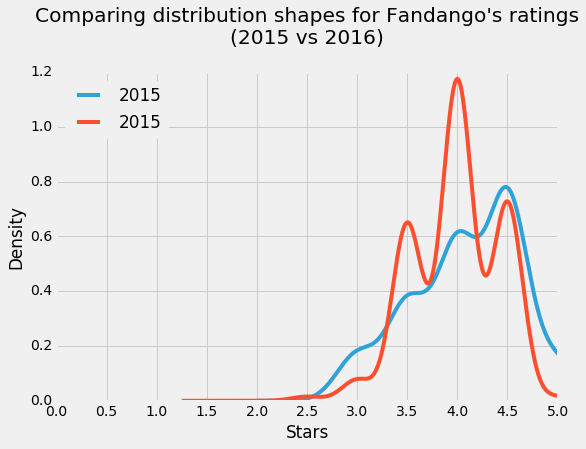

In [35]:
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline
plt.style.use('fivethirtyeight')

fandango_2015['Fandango_Stars'].plot.kde(label = 2015, legend = True, figsize = (8,5.5))
fandango_2016['fandango'].plot.kde(label = 2015, legend = True)

plt.title("Comparing distribution shapes for Fandango's ratings\n(2015 vs 2016)",
          y = 1.07) # the `y` parameter pads the title upward
plt.xlim(0,5) # because ratings start at 0 and end at 5
plt.xticks(arange(0,5.1,.5))
plt.xlabel('Stars')

plt.show()

From the above distribution we can tells the following:
- Both distributions are strongly left-skewed.
- The 2016 distribution is slightly shifted to the left relative to the 2015 distribution.

The left skew suggests that movies on Fandango are given mostly high and very high fan ratings.

The slight left shift of the 2016 distribution shows that ratings were slightly lower compared to 2015. This suggests that there was a difference between ratings for popular movies in 2015 and 2016. We can also see the direction of the difference: the ratings in 2016 were slightly lower compared to 2015.

## Comparing Relative Frequencies

Let's examine the frequency tables of the two distributions to analyze some numbers. Because the datasets have different numbers of movies, we normalize the tables and show percentages instead.

In [39]:
print(str(2015) + '\n' + '-' * 16)
fandango_2015['Fandango_Stars'].value_counts(normalize = True).sort_index() * 100

2015
----------------


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [40]:
print(str(2016) + '\n' + '-' * 16)
fandango_2016['fandango'].value_counts(normalize = True).sort_index() * 100

2016
----------------


2.5     0.581395
3.0     2.906977
3.5    24.418605
4.0    44.186047
4.5    27.325581
5.0     0.581395
Name: fandango, dtype: float64

In 2016, very high ratings (4.5 and 5 stars) had lower percentages compared to 2015. In 2016, only 0.6% of the movies had a perfect rating of 5 stars, when in 2015 the percentage was close to 7%.

The minimum rating in 2016 is 2.5  and in 2015 - 3 stars. There clearly is a difference between the two frequency distributions.

For some other ratings, the percentage went up in 2016. There was a greater percentage of movies in 2016 that received 3.5 and 4 stars, compared to 2015. 3.5 and 4.0 are high ratings, and this challenges the direction of the change we saw on the kernel density plots.

## Determining the Direction of the Change

We'll take a couple of summary statistics to get a more precise picture about the direction of the difference. We'll take each distribution of movie ratings and compute its mean, median, and mode, and then compare these statistics to determine what they tell about the direction of the difference.

In [43]:
mean_2015 = fandango_2015['Fandango_Stars'].mean()
mean_2016 = fandango_2016['fandango'].mean()

median_2015 = fandango_2015['Fandango_Stars'].median()
median_2016 = fandango_2016['fandango'].median()

mode_2015 = fandango_2015['Fandango_Stars'].mode()
mode_2015 = fandango_2016['fandango'].mode()

In [45]:
summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.982558
median,4.000000,4.000000
mode,4.500000,4.000000


In abowe table we can see that the magnitude of the difference is very slight.

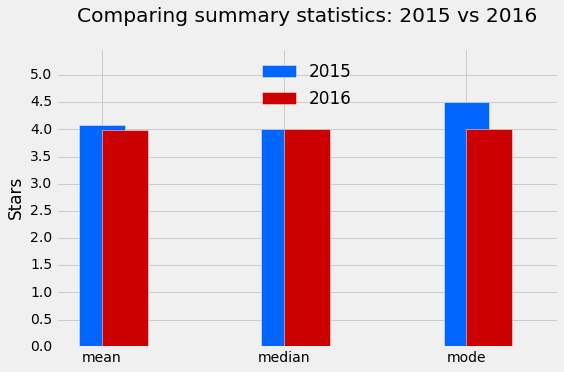

In [50]:
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = .25)
summary['2016'].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = .25, rot = 0, figsize = (8,5))

plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()

In [52]:
print(mean_2015 - mean_2016)

0.10271317829457383


In [53]:
(summary.loc['mean'][0] - summary.loc['mean'][1]) / summary.loc['mean'][0]

0.02514231499051238

The mean rating was lower in 2016 with 0.1. This means a drop of almost 3% relative to the mean rating in 2015. While the median is the same for both distributions, the mode is lower in 2016 by 0.5. Coupled with what we saw for the mean, the direction of the change we saw on the kernel density plot is confirmed: on average, popular movies released in 2016 were rated slightly lower than popular movies released in 2015.

## Conclusion

Our analysis showed that there's indeed a slight difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We also determined that, on average, popular movies released in 2016 were rated lower on Fandango than popular movies released in 2015.